## Análisis de Datos Python IB

### Tópico: Análisis de ventas de VideoJuegos en los últimos 40 años


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'E:/Timeline/ProyectoBim_python/vgsales.csv'
columnas_a_usar = ['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales',
                   'EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']
df_completo = pd.read_csv(
        path,
        usecols=columnas_a_usar,
        index_col='Rank'
        )

In [3]:
print(f'Dimensiones de CSV: ${df_completo.shape}')

Dimensiones de CSV: $(16598, 10)


### Overview

In [4]:
df_completo.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 1) Los 10 videojuegos mas vendidos:

In [5]:
df_mas_vendidos = df_completo[['Name','Global_Sales']]
diez_mas_vendidos = df_mas_vendidos.sort_values(by='Global_Sales',ascending = False).head(10)
diez_mas_vendidos

,Name,Global_Sales
Rank,,
1,Wii Sports,82.74
2,Super Mario Bros.,40.24
3,Mario Kart Wii,35.82
4,Wii Sports Resort,33.00
5,Pokemon Red/Pokemon Blue,31.37
6,Tetris,30.26
7,New Super Mario Bros.,30.01
8,Wii Play,29.02
9,New Super Mario Bros. Wii,28.62


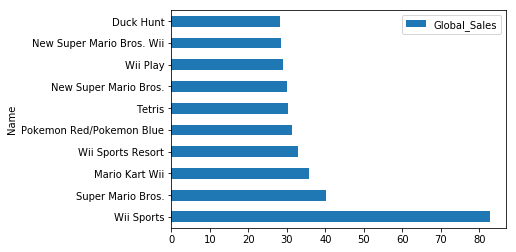

In [7]:
diez_mas_vendidos.plot.barh(x='Name', y='Global_Sales')
plt.show()

### 2) 10 Juegos más vendidos en Estados Unidos

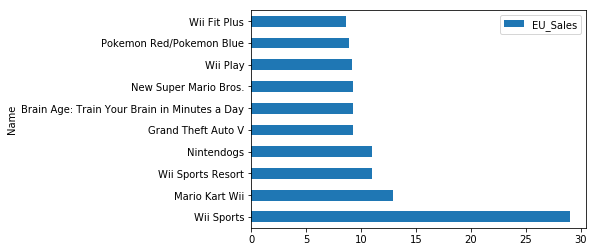

In [11]:
df_mas_vendidos_EU = df_completo[['Name','EU_Sales']]
diez_mas_vendidos_EU = df_mas_vendidos_EU.sort_values(by='EU_Sales',ascending = False).head(10)
diez_mas_vendidos_EU
diez_mas_vendidos_EU.plot.barh(x='Name', y='EU_Sales')

plt.show()

 ### 3) Dominio del mercado japonés 

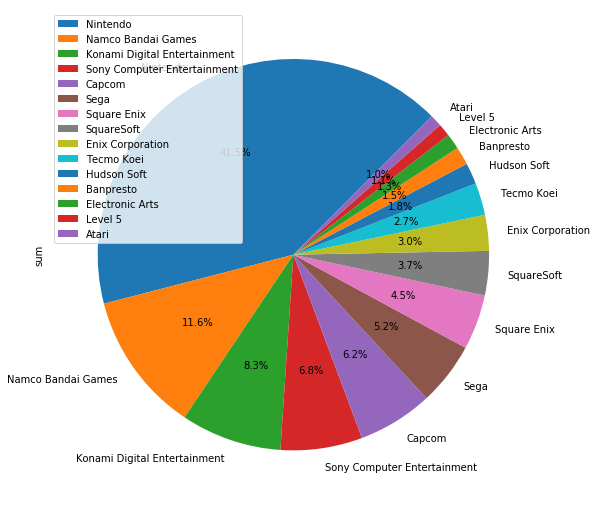

In [12]:
df_Ventas_Pub_JP = df_completo.groupby(['Publisher'])['JP_Sales'].agg(['sum'])
df_Ventas_Pub_US2 = df_Ventas_Pub_JP.sort_values(by='sum', ascending=False).reset_index().drop_duplicates('Publisher', keep='first')
quince_empresas = df_Ventas_Pub_US2.sort_values(by='sum',ascending=False).head(15)

quince_empresas.plot(kind='pie', y = 'sum', autopct='%2.1f%%', figsize=(9,9),
startangle=45, shadow=False, labels=quince_empresas['Publisher'], fontsize=10)
plt.show()

### 4) Numero de juegos por género

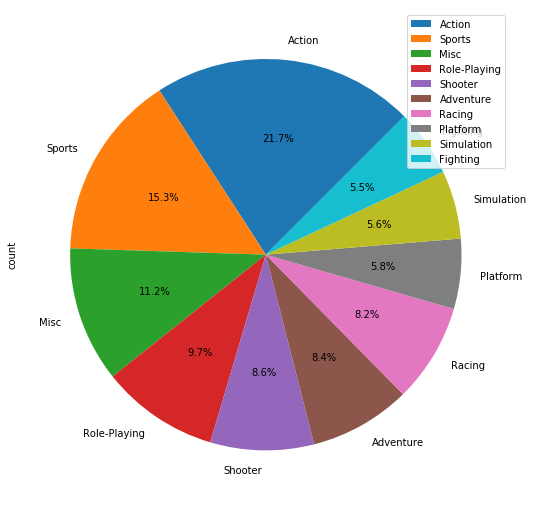

In [13]:
df_generos = df_completo.groupby(['Genre'])['Publisher'].agg(['count'])
df_generos_2 = df_generos.sort_values(by='count', ascending=False).reset_index().drop_duplicates('Genre', keep='first')
diez_generos = df_generos_2.sort_values(by='count',ascending=False).head(10)

diez_generos.plot(kind='pie', y = 'count', autopct='%2.1f%%', figsize=(9,9),
startangle=45, shadow=False, labels=diez_generos['Genre'], fontsize=10)
plt.show()

In [14]:
anios = [2000]


### 6) 10 empresas que mas venden en Norteamerica 

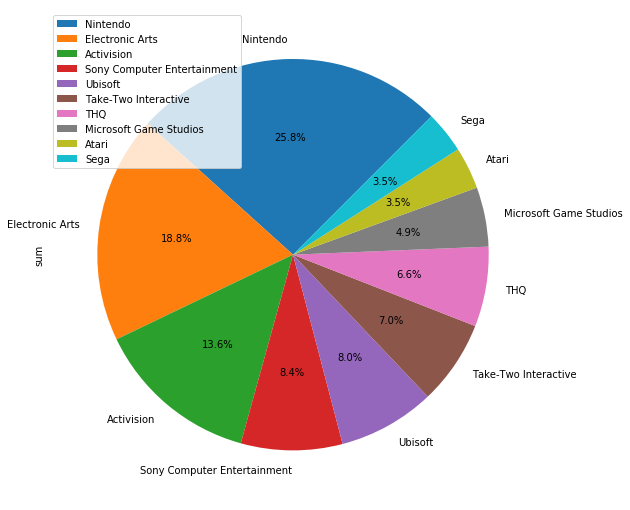

In [32]:
df_Ventas_Pub_NA = df_completo.groupby(['Publisher'])['NA_Sales'].agg(['sum'])
df_Ventas_Pub_NA2 = df_Ventas_Pub_NA.sort_values(by='sum', ascending=False).reset_index().drop_duplicates('Publisher', keep='first')
diez_empresas = df_Ventas_Pub_NA2.sort_values(by='sum',ascending=False).head(10)

diez_empresas.plot(kind='pie', y = 'sum', autopct='%2.1f%%', figsize=(9,9),
startangle=45, shadow=False, labels=diez_empresas['Publisher'], fontsize=10)
plt.show()

### 7) Numero de juegos por Género de la empresa Nintendo

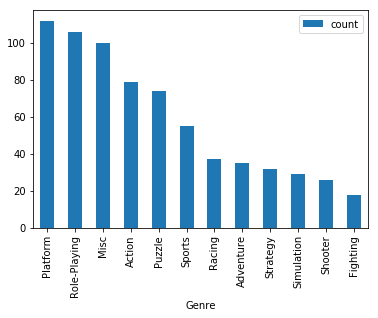

In [53]:
# df_Ventas_Pub_NA = df_completo.groupby(['Publisher'])['NA_Sales'].agg(['sum'])
df_juegos = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos.set_index('Publisher', inplace=True)
df_juegos_pub = df_juegos.loc[['Nintendo'],['Genre']] #.drop_duplicates('Publisher', keep='first')
df_juegos = df_juegos_pub.groupby(['Genre'])['Genre'].agg(['count'])
df_juegos_pub3 = df_juegos.sort_values(by='count', ascending=False)
df_juegos_pub3.reset_index().plot(kind = 'bar', x='Genre', y='count')
plt.show()

### 8) Número de juegos desarrollados por Electronic Arts por Plataforma 

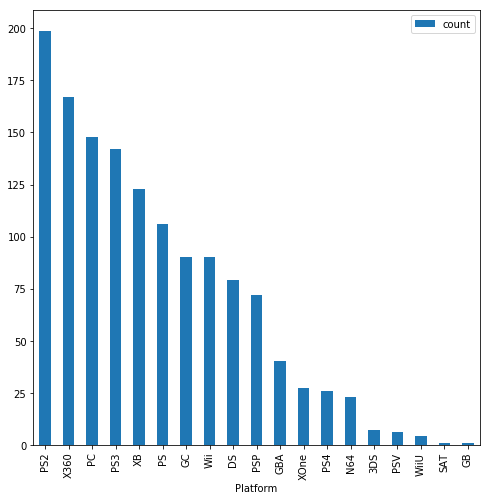

In [25]:
df_juegos2 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos2.set_index('Publisher', inplace=True)
df_juegos_w = df_juegos2.loc[['Electronic Arts'],['Platform']] #.drop_duplicates('Publisher', keep='first')
df_juegos_w2 = df_juegos_w.groupby(['Platform'])['Platform'].agg(['count'])
df_juegos_w3 = df_juegos_w2.sort_values(by='count', ascending=False)
df_juegos_w3.reset_index().plot(kind = 'bar', x='Platform', y='count',  figsize=(8,8))
plt.show()

### 9) Generos que mas desarrolla Sony

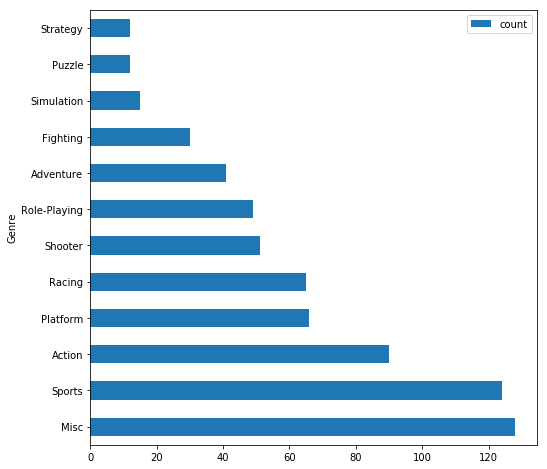

In [16]:
df_juegos3 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos3.set_index('Publisher', inplace=True)
df_juegos_ww = df_juegos3.loc[['Sony Computer Entertainment'],['Genre']] #.drop_duplicates('Publisher', keep='first')
df_juegos_ww2 = df_juegos_ww.groupby(['Genre'])['Genre'].agg(['count'])
df_juegos_ww3 = df_juegos_ww2.sort_values(by='count', ascending=False)
df_juegos_ww3.reset_index().plot.barh( x='Genre', y='count',  figsize=(8,8))
plt.show()

### 10) 10 desarrolladores que más vendieron en Japón en el año 2008

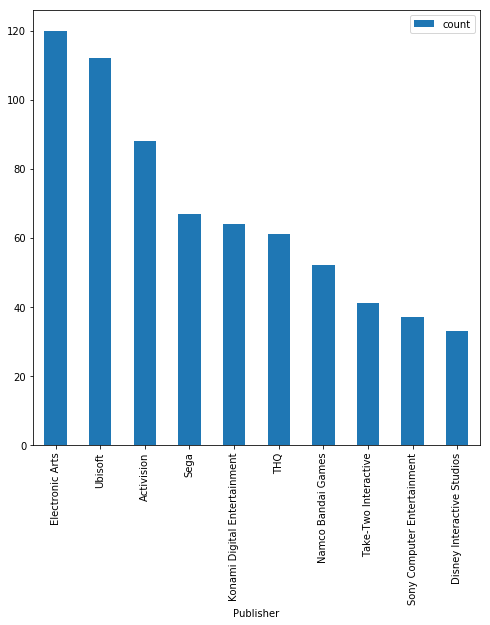

In [14]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Year', inplace=True)
df_juegos_ww = df_juegos4.loc[[2008],['Publisher']] #.drop_duplicates('Publisher', keep='first')
df_juegos_ww2 = df_juegos_ww.groupby(['Publisher'])['Publisher'].agg(['count'])
df_juegos_ww3 = df_juegos_ww2.sort_values(by='count', ascending=False).head(10)
df_juegos_ww3.reset_index().plot(kind='bar', x='Publisher', y='count', figsize=(8,8))
plt.show()

### 11) Numero de juegos de accion vendidos por año

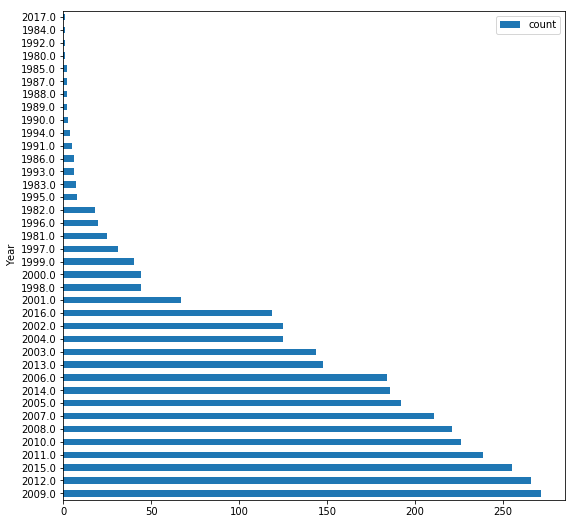

In [17]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Genre', inplace=True)

df_juegos_ww = df_juegos4.loc[['Action'],['Year']] #.drop_duplicates('Publisher', keep='first')
df_juegos_ww2 = df_juegos_ww.groupby(['Year'])['Year'].agg(['count'])
df_juegos_ww3 = df_juegos_ww2.sort_values(by='count', ascending=False)
df_juegos_ww3.reset_index().plot.barh( x='Year', y='count' ,figsize=(9,9))
plt.show()

### 12) Numero de juegos desarrollados para la plataforma Wii por año

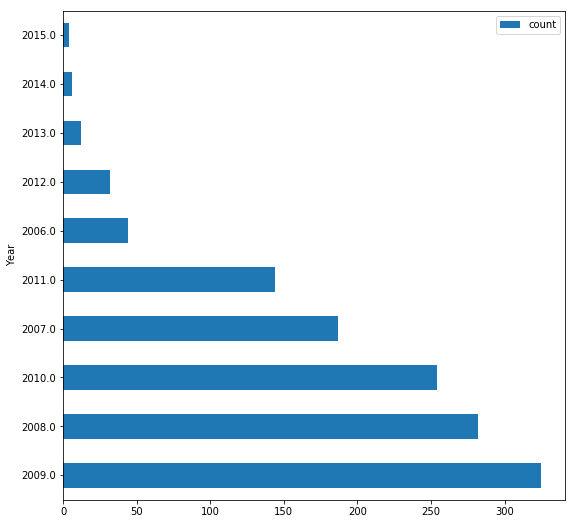

In [23]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Platform', inplace=True)

df_juegos_ww = df_juegos4.loc[['Wii'],['Year']] #.drop_duplicates('Publisher', keep='first')
df_juegos_ww2 = df_juegos_ww.groupby(['Year'])['Year'].agg(['count'])
df_juegos_ww3 = df_juegos_ww2.sort_values(by='count', ascending=False)
df_juegos_ww3.reset_index().plot.barh( x='Year', y='count' ,figsize=(9,9))
plt.show()

### 13) Años en los que SquareSoft produjo más juegos 

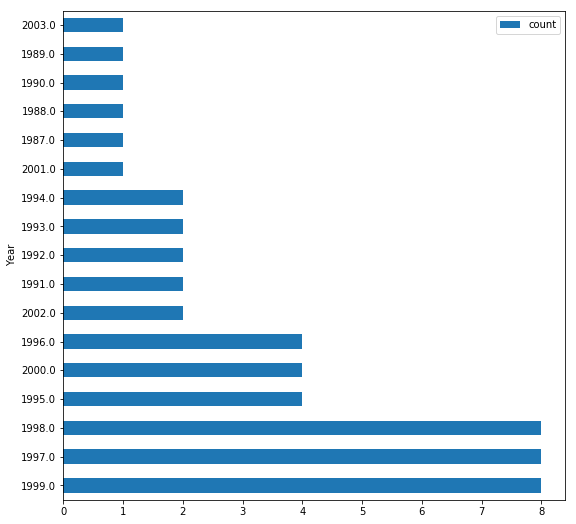

In [18]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Publisher', inplace=True)

df_juegos_ww = df_juegos4.loc[['SquareSoft'],['Year']]
df_juegos_ww2 = df_juegos_ww.groupby(['Year'])['Year'].agg(['count'])
df_juegos_ww3 = df_juegos_ww2.sort_values(by='count', ascending=False)
df_juegos_ww3.reset_index().plot.barh( x='Year', y='count' ,figsize=(9,9))
plt.show()

### 14) Numero de juegos acción producidos por año

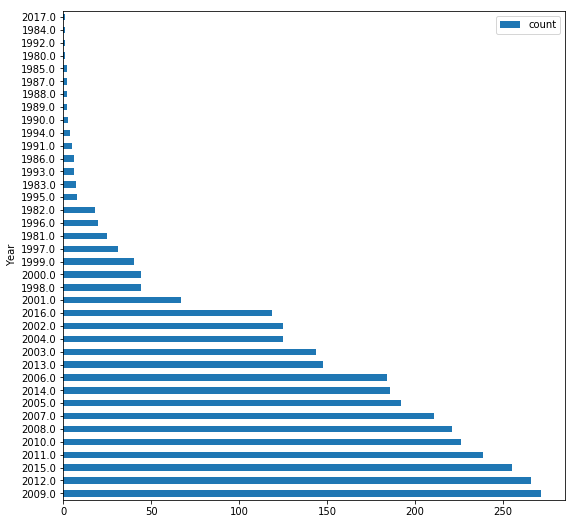

In [19]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Genre', inplace=True)

df_juegos_ww = df_juegos4.loc[['Action'],['Year']]
df_juegos_ww2 = df_juegos_ww.groupby(['Year'])['Year'].agg(['count'])
df_juegos_ww3 = df_juegos_ww2.sort_values(by='count', ascending=False)
df_juegos_ww3.reset_index().plot.barh( x='Year', y='count' ,figsize=(9,9))
plt.show()

### 15) Años en los que más se vendieron juegos de carreras

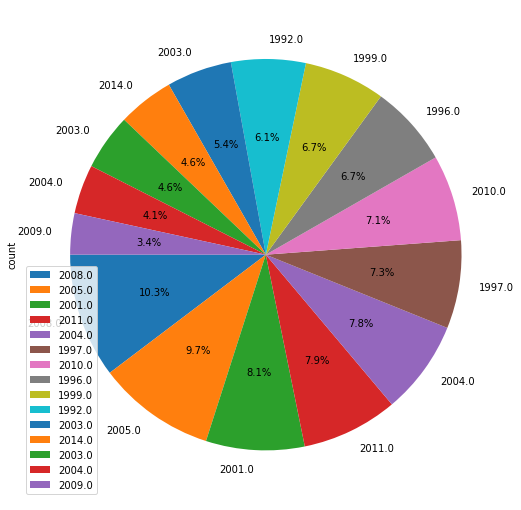

In [45]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Genre', inplace=True)

df_juegos_ww = df_juegos4.loc[['Racing'],['Year']]
df_juegos_ww2 = df_juegos_ww.groupby(['Year'])['Year'].agg(['count'])
df_juegos_ww3 = df_juegos_ww2.sort_values(by='count', ascending=False).head(15)
df_juegos_ww3.reset_index().plot(kind = 'pie', y='count', autopct='%2.1f%%',figsize=(9,9),
startangle=180, shadow=False,labels= df_juegos_ww['Year'], fontsize=10)
plt.show()


### 16) Años en los que más se vendió el juego: Grand Theft Auto V

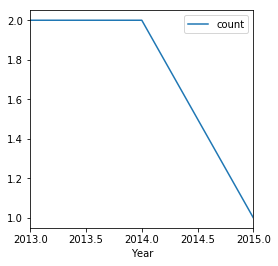

In [88]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Name', inplace=True)

df_juegos_ww = df_juegos4.loc[['Grand Theft Auto V'],['Year']]
df_juegos_ww2 = df_juegos_ww.groupby(['Year'])['Year'].agg(['count'])
#df_juegos_ww3 = df_juegos_ww2.sort_values(by='count', ascending=False)
df_juegos_ww2.reset_index().plot( x='Year', y='count' ,figsize=(4,4))
plt.show()

### 17) Numero de juegos desarrollados para la plataforma PS3 por año

In [42]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Platform', inplace=True)
df_juegos_ww = df_juegos4.loc[['PS3'],['Year']]
df_juegos_ww2 = df_juegos_ww.groupby(['Year'])['Year'].agg(['count'])
df_juegos_ww2

,count
Year,
2006.0,27
2007.0,90
2008.0,139
2009.0,162
2010.0,181
2011.0,216
2012.0,148
2013.0,127
2014.0,108


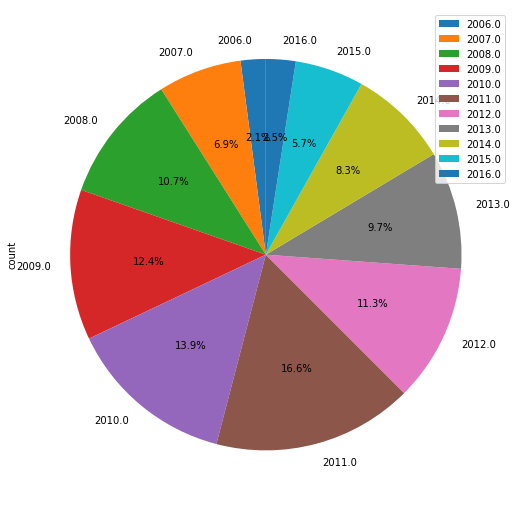

In [49]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Platform', inplace=True)

df_juegos_ww = df_juegos4.loc[['PS3'],['Year']]
df_juegos_ww2 = df_juegos_ww.groupby(['Year'])['Year'].agg(['count'])
years = df_juegos_ww2.reset_index()['Year']
df_juegos_ww2.reset_index().plot(kind = 'pie', y='count', autopct='%2.1f%%',figsize=(9,9),
startangle=90, shadow=False,labels= years, fontsize=10)
plt.show()

### 18) 10 Desarrolladores que produjeron más juegos de pelea

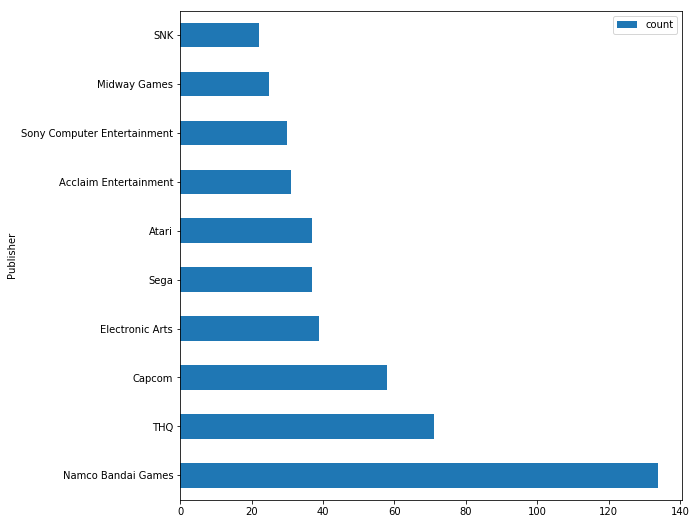

In [22]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Genre', inplace=True)

df_juegos_ww = df_juegos4.loc[['Fighting'],['Publisher']]
df_juegos_ww2 = df_juegos_ww.groupby(['Publisher'])['Publisher'].agg(['count']).sort_values(by='count', ascending=False).head(10)
df_juegos_ww2.reset_index().plot.barh( x='Publisher', y='count' ,figsize=(9,9))
plt.show()

### 19) Evolución de los juegos de deportes por año

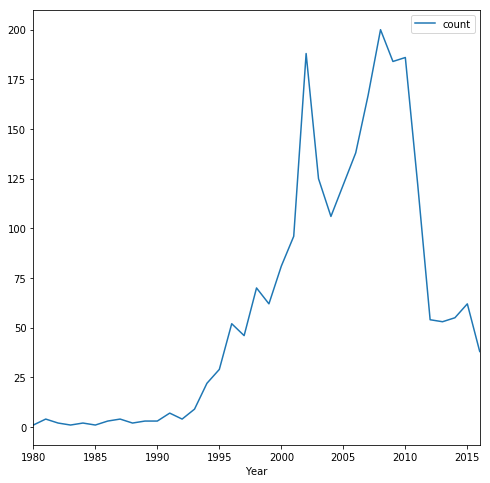

In [97]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Genre', inplace=True)

df_juegos_ww = df_juegos4.loc[['Sports'],['Year']]
df_juegos_ww2 = df_juegos_ww.groupby(['Year'])['Year'].agg(['count'])
#df_juegos_ww3 = df_juegos_ww2.sort_values(by='count', ascending=False)
df_juegos_ww2.reset_index().plot( x='Year', y='count' ,figsize=(8,8))
plt.show()

### 20) Evolución de juegos producidos para la plataforma Xbox One por año

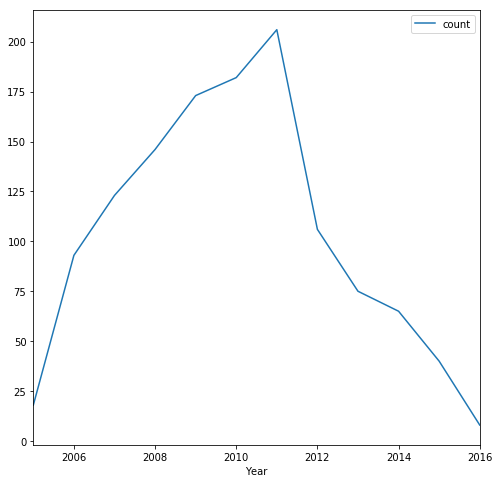

In [51]:
df_juegos4 = pd.read_csv('E:/Timeline/ProyectoBim_python/vgsales.csv')
df_juegos4.set_index('Platform', inplace=True)

df_juegos_ww = df_juegos4.loc[['X360'],['Year']]
df_juegos_ww2 = df_juegos_ww.groupby(['Year'])['Year'].agg(['count'])
#df_juegos_ww3 = df_juegos_ww2.sort_values(by='count', ascending=False)
df_juegos_ww2.reset_index().plot( x='Year', y='count' ,figsize=(8,8))
plt.show()